<a href="https://colab.research.google.com/github/subbu521/EVA4/blob/master/S9/S9_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime

x = datetime.datetime.now()

print(x)


2020-03-17 10:37:25.233879


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/drive/My Drive/EVA/S7')


The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [0]:
import evadataloader
dataloader = evadataloader.DataLoader()

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = dataloader.load(testset)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



  cat truck horse plane


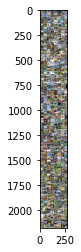

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
#import evamodel

#net = evamodel.Net()


In [0]:
from tqdm import tqdm_notebook, tnrange
import torch.nn.functional as F
import torch
import torch.nn as nn
import torch.nn.functional as F

dropout_value = 0.07
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.convblock0 = nn.Sequential(
          nn.Conv2d(3, 32, 3, padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(32),
          nn.Dropout(dropout_value)
        )

        self.convblock1 = nn.Sequential(
          nn.Conv2d(32, 32, 3,padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(32),
          nn.Dropout(dropout_value)
        )

        self.convblock2 = nn.Sequential(
          nn.Conv2d(32, 32, 3,padding=1),
          nn.ReLU(),
          nn.BatchNorm2d(32),
          nn.Dropout(dropout_value)
        )

        self.pool1 = nn.MaxPool2d(2, 2)

        self.convblock3_0 = nn.Sequential(
          nn.Conv2d(32, 64, 1),
          nn.ReLU(),
          nn.BatchNorm2d(64),
          nn.Dropout(dropout_value)
        )
        self.convblock3 = nn.Sequential(
	      nn.Conv2d(32, 64, 3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Dropout(dropout_value)
        )

        self.convblock4 = nn.Sequential(
        nn.Conv2d(64, 64, 3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Dropout(dropout_value)
        )
        
        self.convblock5 = nn.Sequential(
        nn.Conv2d(64, 64, 3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.Dropout(dropout_value)
        )

        self.pool2 = nn.MaxPool2d(2, 2)


        self.convblock6_0 = nn.Sequential(
        nn.Conv2d(64, 128, 1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Dropout(dropout_value)
        )
        self.convblock6 = nn.Sequential(
        nn.Conv2d(64, 128, 3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Dropout(dropout_value)
        )

        self.convblock7 = nn.Sequential(
        nn.Conv2d(128, 128, 3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Dropout(dropout_value)      
        )

        self.convblock8 = nn.Sequential(
        nn.Conv2d(128, 128, 3,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(128),
        nn.Dropout(dropout_value)      
        )

        self.pool3 = nn.MaxPool2d(2, 2)

       
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=(4,4))
        ) # output_size = 1

        self.convblock10 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)
        ) 




    def forward(self, x):
        x1 = self.convblock0(x) # input conv
        x2 = self.convblock1(x1)
        x2 = x1+x2
        x3 = self.convblock2(x2)
        x3 = x2+x3
        x4 = self.pool1(x3)
        x5 = self.convblock3(x4)
        x4_0 = self.convblock3_0(x4)
        x5 = x4_0+x5
        x6 = self.convblock4(x5)
        x6 = x5+x6
        x7 = self.convblock5(x6)
        x8 = self.pool2(x7)
        x8_0 = self.convblock6_0(x8)
        x9 = self.convblock6(x8)
        x9 = x8_0+x9
        x10 = self.convblock7(x9)
        x10 = x9+x10
        x11 = self.convblock8(x10)
        x12 = F.adaptive_avg_pool2d(x11, 1)        
        y = self.convblock10(x12)
        y = y.view(-1, 10)
        return F.log_softmax(y, dim=-1)
net = Net()

In [0]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,248
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,248
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1

In [0]:
import copy

In [0]:
import evascheduler

In [0]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.2372995615005493 Batch_id=97 Accuracy=40.76: 100%|██████████| 98/98 [00:27<00:00,  4.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5118, Accuracy: 4882/10000 (48.82%)

EPOCH: 1


Loss=1.1142488718032837 Batch_id=97 Accuracy=58.19: 100%|██████████| 98/98 [00:28<00:00,  4.01it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4455, Accuracy: 5545/10000 (55.45%)

EPOCH: 2


Loss=0.8724231719970703 Batch_id=97 Accuracy=64.94: 100%|██████████| 98/98 [00:28<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3511, Accuracy: 6489/10000 (64.89%)

EPOCH: 3


Loss=0.8427439332008362 Batch_id=97 Accuracy=69.39: 100%|██████████| 98/98 [00:28<00:00,  4.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.3265, Accuracy: 6735/10000 (67.35%)

EPOCH: 4


Loss=0.8038123846054077 Batch_id=97 Accuracy=72.82: 100%|██████████| 98/98 [00:28<00:00,  3.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2856, Accuracy: 7144/10000 (71.44%)

EPOCH: 5


Loss=0.7300898432731628 Batch_id=97 Accuracy=75.48: 100%|██████████| 98/98 [00:27<00:00,  3.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2780, Accuracy: 7220/10000 (72.20%)

EPOCH: 6


Loss=0.5685609579086304 Batch_id=97 Accuracy=78.98: 100%|██████████| 98/98 [00:28<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2524, Accuracy: 7476/10000 (74.76%)

EPOCH: 7


Loss=0.6025494337081909 Batch_id=97 Accuracy=80.04: 100%|██████████| 98/98 [00:27<00:00,  3.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2475, Accuracy: 7525/10000 (75.25%)

EPOCH: 8


Loss=0.5181952714920044 Batch_id=97 Accuracy=80.31: 100%|██████████| 98/98 [00:27<00:00,  3.93it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2438, Accuracy: 7562/10000 (75.62%)

EPOCH: 9


Loss=0.5896629095077515 Batch_id=97 Accuracy=80.92: 100%|██████████| 98/98 [00:27<00:00,  3.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2431, Accuracy: 7569/10000 (75.69%)

EPOCH: 10


Loss=0.5882278084754944 Batch_id=97 Accuracy=81.09: 100%|██████████| 98/98 [00:28<00:00,  3.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2447, Accuracy: 7553/10000 (75.53%)

EPOCH: 11


Loss=0.4974674582481384 Batch_id=97 Accuracy=81.40: 100%|██████████| 98/98 [00:28<00:00,  3.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2404, Accuracy: 7596/10000 (75.96%)

EPOCH: 12


Loss=0.4355751574039459 Batch_id=97 Accuracy=82.03: 100%|██████████| 98/98 [00:28<00:00,  3.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2391, Accuracy: 7609/10000 (76.09%)

EPOCH: 13


Loss=0.5071467757225037 Batch_id=97 Accuracy=82.11: 100%|██████████| 98/98 [00:28<00:00,  3.94it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2380, Accuracy: 7620/10000 (76.20%)

EPOCH: 14


Loss=0.5168484449386597 Batch_id=97 Accuracy=82.23: 100%|██████████| 98/98 [00:28<00:00,  3.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2371, Accuracy: 7629/10000 (76.29%)

EPOCH: 15


Loss=0.5146190524101257 Batch_id=97 Accuracy=82.19: 100%|██████████| 98/98 [00:28<00:00,  4.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2384, Accuracy: 7616/10000 (76.16%)

EPOCH: 16


Loss=0.5161762833595276 Batch_id=97 Accuracy=82.29: 100%|██████████| 98/98 [00:27<00:00,  3.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2367, Accuracy: 7633/10000 (76.33%)

EPOCH: 17


Loss=0.5479859113693237 Batch_id=97 Accuracy=82.34: 100%|██████████| 98/98 [00:27<00:00,  4.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2395, Accuracy: 7605/10000 (76.05%)

EPOCH: 18


Loss=0.5508031845092773 Batch_id=97 Accuracy=82.47: 100%|██████████| 98/98 [00:28<00:00,  3.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.2387, Accuracy: 7613/10000 (76.13%)

EPOCH: 19


Loss=0.6552873849868774 Batch_id=97 Accuracy=82.35: 100%|██████████| 98/98 [00:28<00:00,  4.00it/s]



Test set: Average loss: 0.2392, Accuracy: 7608/10000 (76.08%)

